In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import requests
import itertools

from tqdm import tqdm
%matplotlib inline

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [2]:
def try_get_people_face(links):
    num_images = 0
    
    for link in tqdm(links):
        try:
            raw_image = requests.get(link)
            raw_image_transf = np.fromstring(raw_image.content, dtype='uint8')

            cv2_image = cv2.imdecode(raw_image_transf, cv2.IMREAD_UNCHANGED)
            cv2_image_resized = cv2.resize(cv2_image, (300, 300)) 
            cv2_image_resized_without_eyes = cv2_image_resized.copy()

            cv2_image_resized_gray = cv2.cvtColor(cv2_image_resized, 0)
            faces = face_cascade.detectMultiScale(cv2_image_resized_gray, 1.3, 5)

            accept = False
            for (x, y, w, h) in faces:
                face_gray = cv2_image_resized_gray[y:y+h, x:x+w]

                eyes = eye_cascade.detectMultiScale(face_gray)
                for (ex, ey, ew, eh) in eyes:
                    accept = True
                    cv2_image_resized_without_eyes[y+ey:y+ey+eh, x+ex:x+ex+ew] = 0

            if accept:
                num_images += 1
                cv2.imwrite('data/train/p_'+str(num_images)+'.jpg', cv2_image_resized)
                cv2.imwrite('data/train/p_'+str(num_images)+'_without_eyes.jpg', cv2_image_resized_without_eyes)

        except Exception as e:
            pass
        
    print('Downloaded {} faces'.format(num_images))

In [3]:
urls = [
    'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n09618957',
    'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n07942152'
]
    
links = []
for url in urls:
    response = requests.get(url)
    links.append([link[:-1] for link in response.text.split('\n')])

links = list(itertools.chain(*links))
try_get_people_face(links)

100%|██████████| 3005/3005 [1:13:02<00:00,  1.46s/it]

Downloaded 290 faces


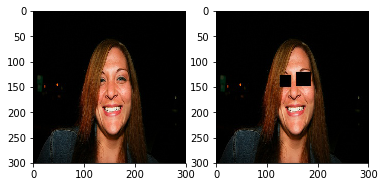

In [11]:
img_test = cv2.imread('data/train/p_119.jpg')
img_test_without_eyes = cv2.imread('data/train/p_119_without_eyes.jpg')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_test_without_eyes, cv2.COLOR_BGR2RGB))

plt.show()

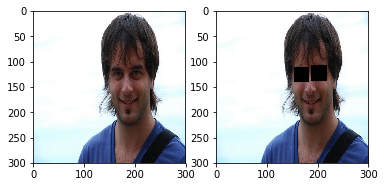

In [12]:
img_test = cv2.imread('data/train/p_170.jpg')
img_test_without_eyes = cv2.imread('data/train/p_170_without_eyes.jpg')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_test_without_eyes, cv2.COLOR_BGR2RGB))

plt.show()

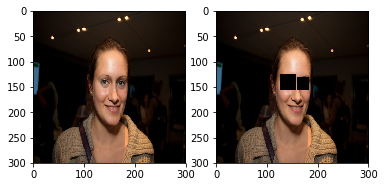

In [13]:
img_test = cv2.imread('data/train/p_250.jpg')
img_test_without_eyes = cv2.imread('data/train/p_250_without_eyes.jpg')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_test_without_eyes, cv2.COLOR_BGR2RGB))

plt.show()

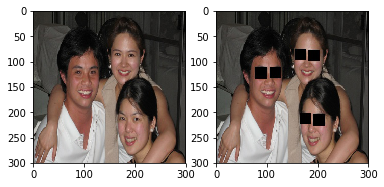

In [14]:
#but ... maybe save faces?
img_test = cv2.imread('data/train/p_273.jpg')
img_test_without_eyes = cv2.imread('data/train/p_273_without_eyes.jpg')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_test_without_eyes, cv2.COLOR_BGR2RGB))

plt.show()